In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
response = requests.get('https://www.rslashfakebaseball.com/api/plateappearances/pitching/MLR/2962')

data = response.json()

In [4]:
arr = np.array(data)
df = pd.DataFrame(data)
print(df.keys())

Index(['paID', 'league', 'season', 'session', 'gameID', 'inning', 'inningID',
       'playNumber', 'outs', 'obc', 'awayScore', 'homeScore', 'pitcherTeam',
       'pitcherName', 'pitcherID', 'hitterTeam', 'hitterName', 'hitterID',
       'pitch', 'swing', 'diff', 'exactResult', 'oldResult', 'resultAtNeutral',
       'resultAllNeutral', 'rbi', 'run', 'batterWPA', 'pitcherWPA', 'pr3B',
       'pr2B', 'pr1B', 'prAB'],
      dtype='object')


Text(0, 0.5, 'Number')

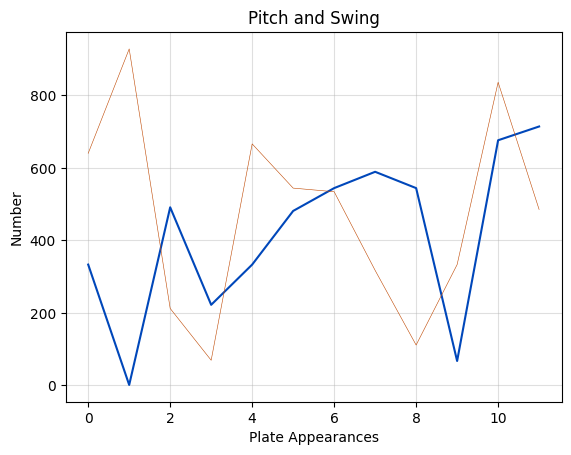

In [5]:
pitches = df.get('pitch')
swings = df.get('swing')
diff = df.get('diff')
x_arr = np.arange(len(pitches))

fig,ax = plt.subplots(1,1)

ax.plot(x_arr, pitches, color = '#0047ba')
ax.plot(x_arr, swings, color = '#bf4700', linewidth = .4)

ax.grid(alpha = .4)
ax.set_title('Pitch and Swing')
ax.set_xlabel('Plate Appearances')
ax.set_ylabel('Number')

In [6]:
_ = np.arange(len(pitches) - 1)

prev_pitch = pitches.to_numpy()[_ + 1] - pitches.to_numpy()[_]

bins = np.zeros(10)
range_bins = np.array(['  0-  99', '100- 199', '200- 299','300- 399','400- 499','500- 599','600- 699','700- 799','800- 899','900-1000'])
diff_bins = np.zeros(10)

for i, pitch in enumerate(pitches):
    if pitch < 100:
        bins[0] += 1
    elif pitch < 200:
        bins[1] += 1
    elif pitch < 300:
        bins[2] += 1
    elif pitch < 400:
        bins[3] += 1
    elif pitch < 500:
        bins[4] += 1
    elif pitch < 600:
        bins[5] += 1
    elif pitch < 700:
        bins[6] += 1
    elif pitch < 800:
        bins[7] += 1
    elif pitch < 900:
        bins[8] += 1
    else:
        bins[9] += 1


range_diff = np.array(['-500 to -400', '-399 to -300', '-299 to -200', '-199 to -100', ' -99 to    0', '   1 to  100', ' 101 to  200', ' 201 to  300', ' 301 to  400', ' 401 to  500'])

for i, pitch in enumerate(prev_pitch):
    if pitch < -401:
        diff_bins[0] += 1
    elif pitch < -301:
        diff_bins[1] += 1
    elif pitch < -201:
        diff_bins[2] += 1
    elif pitch < -101:
        diff_bins[3] += 1
    elif pitch < 1:
        diff_bins[4] += 1
    elif pitch < 101:
        diff_bins[5] += 1
    elif pitch < 201:
        diff_bins[6] += 1
    elif pitch < 301:
        diff_bins[7] += 1
    elif pitch < 401:
        diff_bins[8] += 1
    else:
        diff_bins[9] += 1

print('Pitch Frequency')
for i, (name, bin) in enumerate(zip(range_bins,bins)):
    print(name,'|',bin, '|', round(bin / len(pitches) * 100, 1), '%')

print()

print('Compared to previous pitch')
for i, (name, bin) in enumerate(zip(range_diff,diff_bins)):
    print(name,'|',bin, '|', round(bin / len(pitches) * 100, 1), '%')

print()

Pitch Frequency
  0-  99 | 2.0 | 16.7 %
100- 199 | 0.0 | 0.0 %
200- 299 | 1.0 | 8.3 %
300- 399 | 2.0 | 16.7 %
400- 499 | 2.0 | 16.7 %
500- 599 | 3.0 | 25.0 %
600- 699 | 1.0 | 8.3 %
700- 799 | 1.0 | 8.3 %
800- 899 | 0.0 | 0.0 %
900-1000 | 0.0 | 0.0 %

Compared to previous pitch
-500 to -400 | 1.0 | 8.3 %
-399 to -300 | 1.0 | 8.3 %
-299 to -200 | 1.0 | 8.3 %
-199 to -100 | 0.0 | 0.0 %
 -99 to    0 | 1.0 | 8.3 %
   1 to  100 | 3.0 | 25.0 %
 101 to  200 | 2.0 | 16.7 %
 201 to  300 | 0.0 | 0.0 %
 301 to  400 | 0.0 | 0.0 %
 401 to  500 | 2.0 | 16.7 %



In [7]:
gameID = df.get('gameID')

pitch_num = []

for i, pitch in enumerate(pitches):
    if i != 0:
        if gameID[i] != gameID[i - 1]:
            pitch_num.append(i)
    else:
        pitch_num.append(0)

print(pitch_num)
print(pitches.to_numpy()[pitch_num])

[0]
[333]


In [8]:
print(pitches)

0     333
1       1
2     491
3     222
4     333
5     481
6     544
7     589
8     544
9      67
10    676
11    714
Name: pitch, dtype: int64


In [24]:
players = pd.DataFrame(requests.get('https://www.rslashfakebaseball.com/api/players').json())

dusk = requests.get('https://www.rslashfakebaseball.com/api/players/name/Dusk Jackson').json()

# print(players[players['Team'].notna() & (players['Team'] != "")])
print(players[(players['priPos'] == 'P') & (players['Team'] == "ARI")])
# print(len(players[players['Team'].notna() & (players['Team'] != "")])/30)

      playerID      playerName Team batType pitchType pitchBonus   hand  \
878       1777  Alexander West  ARI       P        SF          H  Right   
966       1963    Slim Mathers  ARI      WC        NT          S  Right   
2041      3167    Kordz Sonata  ARI                FP          B   Left   
2170      3297     Damon Razor  ARI       P        FP          H   Left   

     priPos secPos tertPos            redditName   discordName  \
878       P                       /u/DemBonez665   dembonez665   
966       P                       /u/Jsteele1423  frostysteele   
2041      P                         /u/JKookie69       Jcbeats   
2170      P                 /u/MLR_NoReddit_User       .ikonic   

               discordID  status  posValue  
878   384195152727506944       1         2  
966   126712481396686848       1         2  
2041  386249497292046347       1         2  
2170                   0       1         2  
